In [1]:
#!pip install yfinance

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from config import api_key
import yfinance as yf
from pprint import pprint 

# Create a Dictionary
______________________________________
Begin to set up the place where the data is going to be stored.

In [2]:
electronics_dict = {
    'AAPL':{
        'Quarters':['Q1','Q2','Q3','Q4','Q5'],
        'Revenue':[],
        'Stock Price':[]},
    'DELL':{
        'Quarters':['Q1','Q2','Q3','Q4','Q5'],
        'Revenue':[],
        'Stock Price':[]},
    'INTC':{
        'Quarters':['Q1','Q2','Q3','Q4','Q5'],
        'Revenue':[],
        'Stock Price':[]},
    'MSFT':{
        'Quarters':['Q1','Q2','Q3','Q4','Q5'],
        'Revenue':[],
        'Stock Price':[]},
    'HPQ':{
        'Quarters':['Q1','Q2','Q3','Q4','Q5'],
        'Revenue':[],
        'Stock Price':[]},
    
    }

companies = ['AAPL','DELL','INTC','MSFT','HPQ']

for company in companies:
    url = f"https://financialmodelingprep.com/api/v3/income-statement/{company}\
?period=quarter&limit=5&apikey={api_key}"
    try:
        response = requests.get(url).json()
    except:
        print ("Sorry, we don't have this ticker: " + company)
    for i in range(0,5):
        #electronics_dict[company]['Dates'].append(response[i]['date'])
        electronics_dict[company]['Revenue'].append(response[i]['revenue'])

pprint (electronics_dict)

{'AAPL': {'Quarters': ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'],
          'Revenue': [64698000000,
                      59685000000,
                      58313000000,
                      91819000000,
                      64040000000],
          'Stock Price': []},
 'DELL': {'Quarters': ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'],
          'Revenue': [23482000000,
                      22733000000,
                      21897000000,
                      24032000000,
                      22844000000],
          'Stock Price': []},
 'HPQ': {'Quarters': ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'],
         'Revenue': [15258000000,
                     14294000000,
                     12469000000,
                     14618000000,
                     15407000000],
         'Stock Price': []},
 'INTC': {'Quarters': ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'],
          'Revenue': [18333000000,
                      19728000000,
                      19828000000,
                      20209000000,
                      19190000000

In [3]:
ticker_data = yf.download(tickers = companies, period = '2y', group_by='ticker', auto_adjust = True)

aapl_df = ticker_data['AAPL'].reset_index(drop= False)
dell_df = ticker_data['DELL'].reset_index(drop= False)
intc_df = ticker_data['INTC'].reset_index(drop= False)
msft_df = ticker_data['MSFT'].reset_index(drop= False)
hpq_df = ticker_data['HPQ'].reset_index(drop= False)

dates = ['9/30/2019','12/31/2019','3/31/2020', '6/30/2020','9/30/2020']

aapl_df = aapl_df.loc[aapl_df['Date'].isin(dates)]
dell_df = dell_df.loc[dell_df['Date'].isin(dates)]
intc_df = intc_df.loc[intc_df['Date'].isin(dates)]
msft_df = msft_df.loc[msft_df['Date'].isin(dates)]
hpq_df = hpq_df.loc[hpq_df['Date'].isin(dates)]


def add_stock(df,company):
          for item in list(df['Open']):
                 electronics_dict[company]['Stock Price'].append(item)

add_stock(aapl_df,'AAPL')
add_stock(dell_df,'DELL')
add_stock(intc_df,'INTC')
add_stock(msft_df,'MSFT')
add_stock(hpq_df,'HPQ')


[*********************100%***********************]  5 of 5 completed


In [4]:
pprint(electronics_dict)

{'AAPL': {'Quarters': ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'],
          'Revenue': [64698000000,
                      59685000000,
                      58313000000,
                      91819000000,
                      64040000000],
          'Stock Price': [54.144961533232625,
                          71.27831367448513,
                          62.98753376677777,
                          89.70321855331707,
                          113.59402461955567]},
 'DELL': {'Quarters': ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'],
          'Revenue': [23482000000,
                      22733000000,
                      21897000000,
                      24032000000,
                      22844000000],
          'Stock Price': [50.95000076293945,
                          50.79999923706055,
                          39.459999084472656,
                          53.81999969482422,
                          68.38999938964844]},
 'HPQ': {'Quarters': ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'],
         'Revenue': [152580000

In [5]:
# quarters_list = electronics_dict['AAPL']['Dates']
# quarter = []
# for i in quarters_list:
#     if i <= '9/28/2019' and i > '11/1/2019':
#         quarter.append('Q1')
#     elif i <= '12/28/2019' and i > '1/31/2020':
#         quarter.append('Q2')
        
# print(quarter)

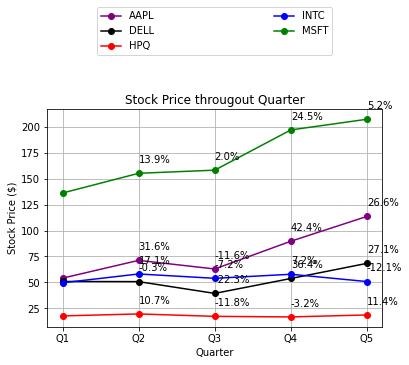

In [35]:
x_values = sorted(electronics_dict['AAPL']['Quarters'], reverse =False)
y_values = electronics_dict['AAPL']['Stock Price']
plt.plot(x_values, y_values, color='purple', label='AAPL', marker='o')
z = 0
for x,y in zip(x_values,y_values):
    if x == 'Q1':
        z = z + 1
        continue
    change = str(round(((float(y_values[z]) / float(y_values[z-1])) - 1) * 100,1)) + '%'
    plt.annotate(
        s = change,
        xy = (x,y),
        xytext = (x,(y + 10))
    )
    z = z + 1

x_values = sorted(electronics_dict['DELL']['Quarters'], reverse =False)
y_values = electronics_dict['DELL']['Stock Price']
plt.plot(x_values, y_values, color='black', label='DELL', marker='o')
z = 0
for x,y in zip(x_values,y_values):
    if x == 'Q1':
        z = z + 1
        continue
    change = str(round(((float(y_values[z]) / float(y_values[z-1])) - 1) * 100,1)) + '%'
    plt.annotate(
        s = change,
        xy = (x,y),
        xytext = (x,(y + 10))
    )
    z = z + 1

x_values = sorted(electronics_dict['HPQ']['Quarters'], reverse =False)
y_values = electronics_dict['HPQ']['Stock Price']
plt.plot(x_values, y_values, color='Red', label='HPQ', marker='o')
z = 0
for x,y in zip(x_values,y_values):
    if x == 'Q1':
        z = z + 1
        continue
    change = str(round(((float(y_values[z]) / float(y_values[z-1])) - 1) * 100,1)) + '%'
    plt.annotate(
        s = change,
        xy = (x,y),
        xytext = (x,(y + 10))
    )
    z = z + 1

x_values = sorted(electronics_dict['INTC']['Quarters'], reverse =False)
y_values = electronics_dict['INTC']['Stock Price']
plt.plot(x_values, y_values, color= 'blue', label= 'INTC', marker= 'o')
z = 0
for x,y in zip(x_values,y_values):
    if x == 'Q1':
        z = z + 1
        continue
    change = str(round(((float(y_values[z]) / float(y_values[z-1])) - 1) * 100,1)) + '%'
    plt.annotate(
        s = change,
        xy = (x,y),
        xytext = (x,(y + 10))
    )
    z = z + 1


x_values = sorted(electronics_dict['MSFT']['Quarters'], reverse =False)
y_values = electronics_dict['MSFT']['Stock Price']
plt.plot(x_values, y_values, color='green', label='MSFT', marker='o')
z = 0
for x,y in zip(x_values,y_values):
    if x == 'Q1':
        z = z + 1
        continue
    change = str(round(((float(y_values[z]) / float(y_values[z-1])) - 1) * 100,1)) + '%'
    plt.annotate(
        s = change,
        xy = (x,y),
        xytext = (x,(y + 10))
    )
    z = z + 1
plt.xlabel('Quarter')
plt.ylabel('Stock Price ($)')
plt.grid()
plt.title('Stock Price througout Quarter')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=5.)

plt.savefig('output_data/StockPrice_comp.png')

In [7]:
# x_values = sorted(electronics_dict['DELL']['Dates'], reverse =False)
# y_values = electronics_dict['DELL']['Stock Price']
# plt.plot(x_values, y_values)
# plt.xlabel('Date')
# plt.ylabel('Stock Price ($)')
# plt.grid()
# plt.title('DELL Stock Price througout Quarter')

KeyError: 'Dates'

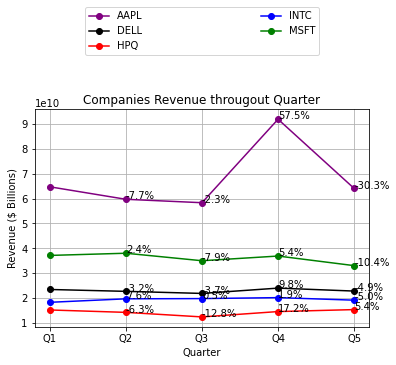

In [36]:
x_values = sorted(electronics_dict['AAPL']['Quarters'], reverse =False)
y_values = electronics_dict['AAPL']['Revenue']
plt.plot(x_values, y_values, color='purple', label='AAPL', marker='o')
z = 0
for x,y in zip(x_values,y_values):
    if x == 'Q1':
        z = z + 1
        continue
    change = str(round(((float(y_values[z]) / float(y_values[z-1])) - 1) * 100,1)) + '%'
    plt.annotate(
        s = change,
        xy = (x,y),
        xytext = (x,(y + 10))
    )
    z = z + 1
x_values = sorted(electronics_dict['DELL']['Quarters'], reverse =False)
y_values = electronics_dict['DELL']['Revenue']
plt.plot(x_values, y_values, color='black', label='DELL', marker='o')
z = 0
for x,y in zip(x_values,y_values):
    if x == 'Q1':
        z = z + 1
        continue
    change = str(round(((float(y_values[z]) / float(y_values[z-1])) - 1) * 100,1)) + '%'
    plt.annotate(
        s = change,
        xy = (x,y),
        xytext = (x,(y + 10))
    )
    z = z + 1

x_values = sorted(electronics_dict['HPQ']['Quarters'], reverse =False)
y_values = electronics_dict['HPQ']['Revenue']
plt.plot(x_values, y_values, color='Red', label='HPQ', marker='o')
z = 0
for x,y in zip(x_values,y_values):
    if x == 'Q1':
        z = z + 1
        continue
    change = str(round(((float(y_values[z]) / float(y_values[z-1])) - 1) * 100,1)) + '%'
    plt.annotate(
        s = change,
        xy = (x,y),
        xytext = (x,(y + 10))
    )
    z = z + 1

x_values = sorted(electronics_dict['INTC']['Quarters'], reverse =False)
y_values = electronics_dict['INTC']['Revenue']
plt.plot(x_values, y_values, color= 'blue', label= 'INTC', marker= 'o')
z = 0
for x,y in zip(x_values,y_values):
    if x == 'Q1':
        z = z + 1
        continue
    change = str(round(((float(y_values[z]) / float(y_values[z-1])) - 1) * 100,1)) + '%'
    plt.annotate(
        s = change,
        xy = (x,y),
        xytext = (x,(y + 10))
    )
    z = z + 1

x_values = sorted(electronics_dict['MSFT']['Quarters'], reverse =False)
y_values = electronics_dict['MSFT']['Revenue']
plt.plot(x_values, y_values, color='green', label='MSFT', marker='o')
z = 0
for x,y in zip(x_values,y_values):
    if x == 'Q1':
        z = z + 1
        continue
    change = str(round(((float(y_values[z]) / float(y_values[z-1])) - 1) * 100,1)) + '%'
    plt.annotate(
        s = change,
        xy = (x,y),
        xytext = (x,(y + 10))
    )
    z = z + 1









plt.xlabel('Quarter')
plt.ylabel('Revenue ($ Billions)')
plt.grid()
plt.title('Companies Revenue througout Quarter')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=5.)
plt.savefig('output_data/CompaniesRevenue_comp.png')